<a href="https://colab.research.google.com/github/sagihaider/EEG_Deep/blob/master/main_Single_Trial_Classification_EEGNet_NSL_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/EEG_Deep.git

Cloning into 'EEG_Deep'...
remote: Enumerating objects: 247, done.
remote: Total 247 (delta 0), reused 0 (delta 0), pack-reused 247
Receiving objects: 100% (247/247), 1.07 GiB | 40.12 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Checking out files: 100% (70/70), done.


In [2]:
import scipy.io as spio
import numpy as np
from importlib.machinery import SourceFileLoader

# EEGNet-specific imports
from EEG_Deep.EEGModels import EEGNet, ShallowConvNet, DeepConvNet
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter

!pip install neural_structured_learning
import neural_structured_learning as nsl
import tensorflow as tf

     |████████████████████████████████| 112kB 4.6MB/s 


In [0]:
# Band-pass Filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


EEG_Deep/Data2A/Data_A01T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A01E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 53ms/step - loss: 1.4017 - categorical_crossentropy: 1.4017 - categorical_accuracy: 0.2958 - val_loss: 1.3825 - val_categorical_crossentropy: 1.3825 - val_categorical_accuracy: 0.2553
Epoch 2/500
8/8 [==============================] - 0s 16ms/step - loss: 1.3697 - categorical_crossentropy: 1.3697 - categorical_accuracy: 0.3250 - val_loss: 1.3801 - val_categorical_crossentropy: 1.3801 - val_categorical_accuracy: 0.2553
Epoch 3/500
8/8 [==============================] - 0s 15ms/step - loss: 1.3437 - categorical_crossentropy: 1.3437 - categorical_accuracy: 0.3958 - val_loss: 1.3776 - val_categorical_crossen

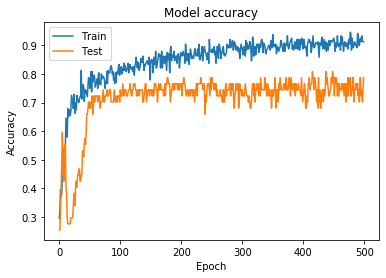


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 0.5764 - categorical_crossentropy: 0.5764 - categorical_accuracy: 0.7500
test loss, test acc: [0.5763810906145308, 0.5763811, 0.75]
EEG_Deep/Data2A/Data_A02T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A02E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 50ms/step - loss: 1.3969 - categorical_crossentropy: 1.3969 - categorical_accuracy: 0.2625 - val_loss: 1.3874 - val_categorical_crossentropy: 1.3874 - val_categorical_accuracy: 0.2766
Epoch 2/500
8/8 [==============================] - 0s 15ms/step - loss: 1.3784 - categorical_crossentropy: 1.3784 - categorical_accuracy: 0.2917 - val_loss: 1.3871 - val_categorical_crossentropy: 1.3871 - val_c

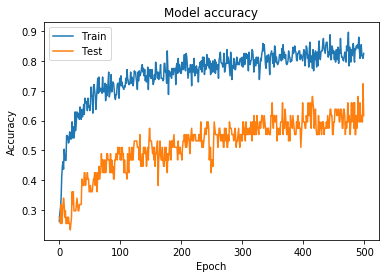


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 1.2108 - categorical_crossentropy: 1.2108 - categorical_accuracy: 0.5000
test loss, test acc: [1.2107580370373197, 1.2107581, 0.5]
EEG_Deep/Data2A/Data_A03T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A03E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 51ms/step - loss: 1.4230 - categorical_crossentropy: 1.4230 - categorical_accuracy: 0.2583 - val_loss: 1.3842 - val_categorical_crossentropy: 1.3842 - val_categorical_accuracy: 0.2340
Epoch 2/500
8/8 [==============================] - 0s 14ms/step - loss: 1.3586 - categorical_crossentropy: 1.3586 - categorical_accuracy: 0.3333 - val_loss: 1.3830 - val_categorical_crossentropy: 1.3830 - val_ca

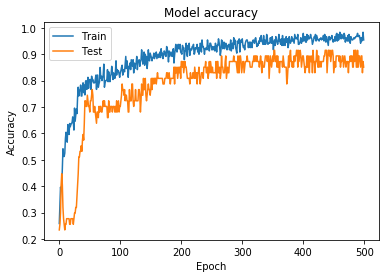


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 0.3466 - categorical_crossentropy: 0.3466 - categorical_accuracy: 0.8854
test loss, test acc: [0.34663600557380253, 0.346636, 0.8854167]
EEG_Deep/Data2A/Data_A04T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A04E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 52ms/step - loss: 1.4032 - categorical_crossentropy: 1.4032 - categorical_accuracy: 0.2792 - val_loss: 1.3888 - val_categorical_crossentropy: 1.3888 - val_categorical_accuracy: 0.2979
Epoch 2/500
8/8 [==============================] - 0s 14ms/step - loss: 1.3738 - categorical_crossentropy: 1.3738 - categorical_accuracy: 0.3458 - val_loss: 1.3876 - val_categorical_crossentropy: 1.3876 - 

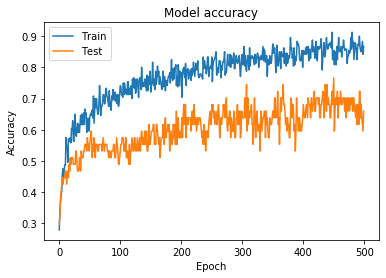


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 0.8444 - categorical_crossentropy: 0.8444 - categorical_accuracy: 0.6458
test loss, test acc: [0.8443766766124301, 0.84437674, 0.6458333]
EEG_Deep/Data2A/Data_A05T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A05E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 52ms/step - loss: 1.3966 - categorical_crossentropy: 1.3966 - categorical_accuracy: 0.2500 - val_loss: 1.3871 - val_categorical_crossentropy: 1.3871 - val_categorical_accuracy: 0.2340
Epoch 2/500
8/8 [==============================] - 0s 15ms/step - loss: 1.3737 - categorical_crossentropy: 1.3737 - categorical_accuracy: 0.2875 - val_loss: 1.3856 - val_categorical_crossentropy: 1.3856 -

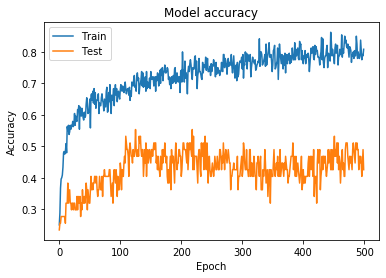


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 1.2617 - categorical_crossentropy: 1.2617 - categorical_accuracy: 0.4514
test loss, test acc: [1.2616715166303847, 1.2616714, 0.4513889]
EEG_Deep/Data2A/Data_A06T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A06E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 56ms/step - loss: 1.3879 - categorical_crossentropy: 1.3879 - categorical_accuracy: 0.2833 - val_loss: 1.3859 - val_categorical_crossentropy: 1.3859 - val_categorical_accuracy: 0.3191
Epoch 2/500
8/8 [==============================] - 0s 15ms/step - loss: 1.3681 - categorical_crossentropy: 1.3681 - categorical_accuracy: 0.3125 - val_loss: 1.3835 - val_categorical_crossentropy: 1.3835 - 

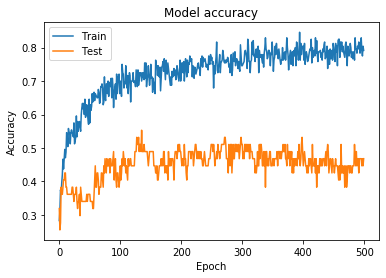


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 1.3112 - categorical_crossentropy: 1.3112 - categorical_accuracy: 0.4965
test loss, test acc: [1.3111774391598172, 1.3111775, 0.4965278]
EEG_Deep/Data2A/Data_A07T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A07E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 54ms/step - loss: 1.4069 - categorical_crossentropy: 1.4069 - categorical_accuracy: 0.2208 - val_loss: 1.3832 - val_categorical_crossentropy: 1.3832 - val_categorical_accuracy: 0.2128
Epoch 2/500
8/8 [==============================] - 0s 15ms/step - loss: 1.3707 - categorical_crossentropy: 1.3707 - categorical_accuracy: 0.2875 - val_loss: 1.3812 - val_categorical_crossentropy: 1.3812 - 

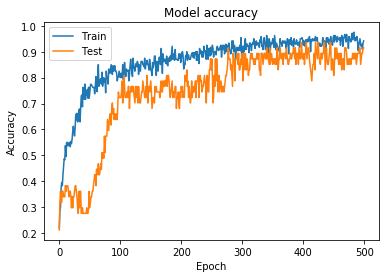


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 0.4444 - categorical_crossentropy: 0.4444 - categorical_accuracy: 0.8576
test loss, test acc: [0.44436917536788517, 0.4443692, 0.8576389]
EEG_Deep/Data2A/Data_A08T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A08E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 53ms/step - loss: 1.4031 - categorical_crossentropy: 1.4031 - categorical_accuracy: 0.2708 - val_loss: 1.3870 - val_categorical_crossentropy: 1.3870 - val_categorical_accuracy: 0.2340
Epoch 2/500
8/8 [==============================] - 0s 15ms/step - loss: 1.3766 - categorical_crossentropy: 1.3766 - categorical_accuracy: 0.2917 - val_loss: 1.3854 - val_categorical_crossentropy: 1.3854 -

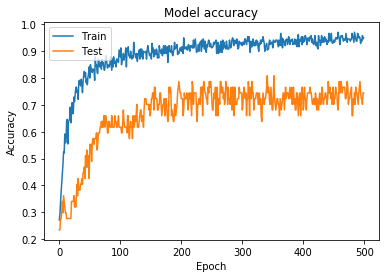


# Evaluate on test data
9/9 [==============================] - 0s 12ms/step - loss: 0.5712 - categorical_crossentropy: 0.5712 - categorical_accuracy: 0.7778
test loss, test acc: [0.571230540672938, 0.57123053, 0.7777778]
EEG_Deep/Data2A/Data_A09T.mat
(288, 22, 1875)
(288, 1)
(240, 22, 750)
(240, 1)
(47, 22, 750)
(47, 1)
X_train shape: (240, 1, 22, 750)
240 train samples
47 val samples
EEG_Deep/Data2A/Data_A09E.mat
(288, 22, 1875)
(288, 1)
(288, 22, 750)
(288, 1)
X_train shape: (288, 1, 22, 750)
288 train samples
Train on 8 steps, validate on 2 steps
Epoch 1/500
8/8 [==============================] - 0s 53ms/step - loss: 1.4166 - categorical_crossentropy: 1.4166 - categorical_accuracy: 0.2333 - val_loss: 1.3814 - val_categorical_crossentropy: 1.3814 - val_categorical_accuracy: 0.2766
Epoch 2/500
8/8 [==============================] - 0s 14ms/step - loss: 1.3528 - categorical_crossentropy: 1.3528 - categorical_accuracy: 0.3583 - val_loss: 1.3776 - val_categorical_crossentropy: 1.3776 - 

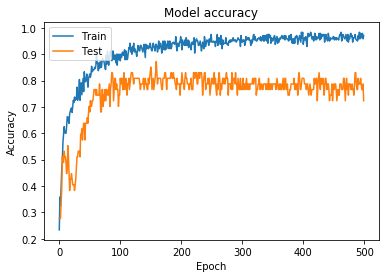


# Evaluate on test data
9/9 [==============================] - 0s 13ms/step - loss: 0.5958 - categorical_crossentropy: 0.5958 - categorical_accuracy: 0.7951
test loss, test acc: [0.5957680013444688, 0.595768, 0.7951389]
[[0.57638109 0.75      ]
 [1.21075809 0.5       ]
 [0.346636   0.88541669]
 [0.84437674 0.64583331]
 [1.26167142 0.4513889 ]
 [1.31117749 0.49652779]
 [0.4443692  0.8576389 ]
 [0.57123053 0.77777779]
 [0.59576797 0.7951389 ]]


<Figure size 432x288 with 0 Axes>

In [6]:
from numpy import zeros
K.clear_session()
cols = 2
rows = 9
acc_all = zeros([rows, cols])
X_tr = np.empty([288, 22, 1875])
X_ts = np.empty([288, 22, 1875])


for x in range(1,10):
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'T.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_tr = mat['cleanRawEEGData']
  y_tr = mat['cleanClassLabels']
  
  print(np.shape(r_X_tr))
  print(np.shape(y_tr))

  for t in range(r_X_tr.shape[0]):
    tril = r_X_tr[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_tr[t,:,:] = tril_filtered 
    
  # split data of each subject in training and validation
  X_train      = X_tr[0:240,:,500:1250]
  Y_train      = y_tr[0:240]
  X_val       = X_tr[241:,:,500:1250]
  Y_val       = y_tr[241:]

  print(np.shape(X_train))
  print(np.shape(Y_train))
  print(np.shape(X_val))
  print(np.shape(Y_val))
  
  # convert labels to one-hot encodings.
  Y_train      = np_utils.to_categorical(Y_train-1)
  Y_val       = np_utils.to_categorical(Y_val-1)

  kernels, chans, samples = 1, 22, 750
  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_train      = X_train.reshape(X_train.shape[0], kernels, chans, samples)
  X_val       = X_val.reshape(X_val.shape[0], kernels, chans, samples)
   
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_val.shape[0], 'val samples')

  # Load test data         
  fName = 'EEG_Deep/Data2A/Data_A0' + str(x) + 'E.mat'  # Load Data
  print(fName)
  mat = spio.loadmat(fName)
  r_X_ts = mat['cleanRawEEGData']
  y_ts = mat['cleanClassLabels']

  print(np.shape(r_X_ts))
  print(np.shape(y_ts))

  for t in range(r_X_ts.shape[0]):
    tril = r_X_ts[t,:,:]
    # tril = tril.transpose()
    tril_filtered = butter_bandpass_filter(tril, 
                                              lowcut=4, 
                                              highcut=40, 
                                              fs=250,
                                              order=4)
    # tril_filtered = tril_filtered.transpose()
    X_ts[t,:,:] = tril_filtered 

  X_test      = X_ts[:,:,500:1250]
  Y_test      = y_ts[:]
  print(np.shape(X_test))
  print(np.shape(Y_test))

  #convert labels to one-hot encodings.
  Y_test      = np_utils.to_categorical(Y_test-1)

  # convert data to NCHW (trials, kernels, channels, samples) format. Data 
  # contains 22 channels and 500 time-points. Set the number of kernels to 1.
  X_test      = X_test.reshape(X_test.shape[0], kernels, chans, samples)

  print('X_train shape:', X_test.shape)
  print(X_test.shape[0], 'train samples')

  # configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
  # model configurations may do better, but this is a good starting point)
  model = EEGNet(nb_classes = 4, Chans = 22, Samples = 750, 
                 dropoutRate = 0.5, kernLength = 25, F1 = 8, 
                 D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')

  adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.5, adv_grad_norm='infinity')
  adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
  
  # compile the model and set the optimizers
  adv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  batch_size = 32

  X_train = tf.cast(X_train, tf.float32)
  X_test = tf.cast(X_test, tf.float32)
  X_val = tf.cast(X_val, tf.float32)


  train_data = tf.data.Dataset.from_tensor_slices({'input': X_train, 'label': Y_train}).batch(batch_size)
  val_data = tf.data.Dataset.from_tensor_slices({'input': X_val, 'label': Y_val}).batch(batch_size)
  test_data = tf.data.Dataset.from_tensor_slices({'input': X_test, 'label': Y_test}).batch(batch_size)

  val_steps = X_val.shape[0] // batch_size

  
  # adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=500, verbose=1)

  history = adv_model.fit(train_data, validation_data=val_data, validation_steps=None, epochs=500, verbose=1)

  # Plot training & validation accuracy values
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  figName = 'Accuracy_A0' + str(x) + '.png'  
  plt.savefig(figName)

  print('\n# Evaluate on test data')
  results = adv_model.evaluate(test_data)
  print('test loss, test acc:', results)

  acc_all[x - 1, 0] = results[1]
  acc_all[x - 1, 1] = results[2]

  from keras import backend as K 
  # Do some code, e.g. train and save model
  K.clear_session()


print(acc_all)